# Is London's murder rate really worse than New York's? 

### rate = number per year per 10,000 inhabitants.

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
import pandas as pd
import numpy as np

In [3]:
webpage = "https://en.wikipedia.org/wiki/Crime_in_London"

In [4]:
page = requests.get(webpage)
page.status_code

200

In [5]:
soup = BeautifulSoup(page.text, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Crime in London - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Crime_in_London","wgTitle":"Crime in London","wgCurRevisionId":866929293,"wgRevisionId":866929293,"wgArticleId":25753191,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Wikipedia introduction cleanup from December 2011","All pages needing cleanup","Articles covered by WikiProject Wikify from December 2011","All articles covered by WikiProject Wikify","All articles with failed verification","Articles with failed verificatio

In [6]:
all_tables = soup.find_all('table')
all_tables

[<table class="plainlinks metadata ambox ambox-content ambox-lead_too_short" role="presentation"><tbody><tr><td class="mbox-image"><div style="width:52px"><a class="image" href="/wiki/File:Wiki_letter_w.svg"><img alt="Wiki letter w.svg" data-file-height="44" data-file-width="44" height="40" src="//upload.wikimedia.org/wikipedia/en/thumb/6/6c/Wiki_letter_w.svg/40px-Wiki_letter_w.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/6/6c/Wiki_letter_w.svg/60px-Wiki_letter_w.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/6/6c/Wiki_letter_w.svg/80px-Wiki_letter_w.svg.png 2x" width="40"/></a></div></td><td class="mbox-text"><div class="mbox-text-span">This article's <b><a href="/wiki/Wikipedia:Manual_of_Style/Lead_section" title="Wikipedia:Manual of Style/Lead section">lead section</a> does not adequately <a href="/wiki/Wikipedia:Summary_style" title="Wikipedia:Summary style">summarize</a> key points of its contents</b>.<span class="hide-when-compact"> Please consider expandin

In [7]:
len(all_tables)

9

In [8]:
homicide_table = all_tables[2]

In [9]:
row1 = []
row2 = []
row3 = []
i = 0
for row in homicide_table.findAll("tr"):
    if i==0: 
        row1 = row.findAll('th')
    if i==1: 
        row2 = row.findAll('td')
    if i==2: 
        row3 = row.findAll('td')
    i = i+1   

In [10]:
row1

[<th>Crime rate
 </th>, <th>1990
 </th>, <th>1991
 </th>, <th>1992
 </th>, <th>1993
 </th>, <th>1994
 </th>, <th>1995
 </th>, <th>1996
 </th>, <th>1997
 </th>, <th>1998
 </th>, <th>1999
 </th>, <th>2000
 </th>, <th>2001
 </th>, <th>2002
 </th>, <th>2003
 </th>, <th>2004
 </th>, <th>2005
 </th>, <th>2006
 </th>, <th>2007
 </th>, <th>2008
 </th>, <th>2009
 </th>, <th>2010
 </th>, <th>2011
 </th>, <th>2012
 </th>, <th>2013
 </th>, <th>2014
 </th>, <th>2015
 </th>, <th>2016
 </th>, <th>2017
 </th>]

In [11]:
date = []
total = []
rate = []

for i in range(len(row1)):
    print(row1[i].contents[0])
    date.append(row1[i].contents[0]) 
    
    print(row2[i].contents[0])
    total.append(row2[i].contents[0]) 
    
    print(row3[i].contents[0])
    rate.append(row3[i].contents[0]) 

Crime rate

Homicide total
Homicide rate
1990

184
2.5
1991

184
2.5
1992

175
2.3
1993

160
2.1
1994

169
2.3
1995

167
2.2
1996

139
1.9
1997

190
2.5
1998

159
2.1
1999

146
1.9
2000

171
2.3
2001

190
2.5
2002

189
2.5
2003

204
2.7
2004

182
2.4
2005

168
2.2
2006

162
2.2
2007

156
2.1
2008

148
2.0
2009

136
1.9
2010

123
1.5
2011

121
1.5
2012

89
1.1
2013

86


2014

83


2015

118


2016

110



2017

131





In [12]:
data = pd.DataFrame(np.column_stack([date, total, rate]),
                    columns=["date","homicide_total", "homicide_rate"])

In [13]:
data

,date,homicide_total,homicide_rate
0,Crime rate\n,Homicide total,Homicide rate
1,1990\n,184,2.5
2,1991\n,184,2.5
3,1992\n,175,2.3
4,1993\n,160,2.1
5,1994\n,169,2.3
6,1995\n,167,2.2
7,1996\n,139,1.9
8,1997\n,190,2.5
9,1998\n,159,2.1


In [14]:
data['date'] = data['date'].str.replace('\n', '')
data['homicide_total'] = data['homicide_total'].str.replace('\n', '')
data['homicide_rate'] = data['homicide_rate'].str.replace('\n', '')

data = data.drop([0])
data

,date,homicide_total,homicide_rate
1,1990,184,2.5
2,1991,184,2.5
3,1992,175,2.3
4,1993,160,2.1
5,1994,169,2.3
6,1995,167,2.2
7,1996,139,1.9
8,1997,190,2.5
9,1998,159,2.1
10,1999,146,1.9


In [15]:
data.set_index('date', inplace=True)
data

,homicide_total,homicide_rate
date,,
1990,184,2.5
1991,184,2.5
1992,175,2.3
1993,160,2.1
1994,169,2.3
1995,167,2.2
1996,139,1.9
1997,190,2.5
1998,159,2.1


In [16]:
for i in range (len(data)):
    data.homicide_total[i] = int(data.homicide_total[i])
    if data.homicide_rate[i]:
        data.homicide_rate[i] = float(data.homicide_rate[i])

In [17]:
# put that all into a function

def table_into_df(table_name):
    row1 = []
    row2 = []
    row3 = []
    i = 0
    for row in table_name.findAll("tr"):
        if i==0: 
            row1 = row.findAll('th')
        if i==1: 
            row2 = row.findAll('td')
        if i==2: 
            row3 = row.findAll('td')
        i = i+1   
        
    
    date = []
    col2 = []
    col3 = []
    
    for i in range(len(row1)):
        date.append(row1[i].contents[0]) 
        col2.append(row2[i].contents[0]) 
        col3.append(row3[i].contents[0])   
        
    data = pd.DataFrame(np.column_stack([date, col2, col3]),
                    columns=["date","total", "rate"])    
    
    return data
        

In [18]:
data2 = table_into_df(all_tables[2])

In [19]:
data2

,date,total,rate
0,Crime rate\n,Homicide total,Homicide rate
1,1990\n,184,2.5
2,1991\n,184,2.5
3,1992\n,175,2.3
4,1993\n,160,2.1
5,1994\n,169,2.3
6,1995\n,167,2.2
7,1996\n,139,1.9
8,1997\n,190,2.5
9,1998\n,159,2.1


In [20]:
def clean_table(dataframe):
    dataframe['date']  = dataframe['date'].str.replace('\n', '')
    dataframe['total'] = dataframe['total'].str.replace('\n', '')
    dataframe['rate']  = dataframe['rate'].str.replace('\n', '')
       
    dataframe = dataframe.drop([0])
    
    return dataframe

In [21]:
def string_to_number(dataframe):
    
    # population London 2017: 8.787 million
    london_pop = 87.
    
    for i in range(len(dataframe)):
        dataframe.total[i] = int(dataframe.total[i])
        if dataframe.rate[i]:
            dataframe.rate[i]  = float(dataframe.rate[i]) 
        else:
            dataframe.rate[i]  = dataframe.total[i] / london_pop
        
    return dataframe

In [22]:
london_homicide = clean_table(data2)
london_homicide.set_index('date', inplace=True)
london_homicide = string_to_number(london_homicide)

In [23]:
london_homicide

,total,rate
date,,
1990,184,2.5
1991,184,2.5
1992,175,2.3
1993,160,2.1
1994,169,2.3
1995,167,2.2
1996,139,1.9
1997,190,2.5
1998,159,2.1


In [24]:
all_tables[5]

<table class="wikitable" style="text-align:right; margin-right:60px">
<tbody><tr>
<th>Crime rate
</th>
<th>1999
</th>
<th>2000
</th>
<th>2001
</th>
<th>2002
</th>
<th>2003
</th>
<th>2004
</th>
<th>2005
</th>
<th>2006
</th>
<th>2007
</th>
<th>2008
</th>
<th>2009
</th></tr>
<tr>
<td>Gun-enabled crime</td>
<td>2961</td>
<td>3250</td>
<td>4005</td>
<td>4444</td>
<td>4025</td>
<td>3744</td>
<td>3881</td>
<td>3327</td>
<td>3459</td>
<td>2525</td>
<td>3295
</td></tr>
<tr>
<td>Rate per 10,000 London</td>
<td>3.9</td>
<td>4.3</td>
<td>5.3</td>
<td>5.9</td>
<td>5.4</td>
<td>4.9</td>
<td>5.2</td>
<td>4.4</td>
<td>4.6</td>
<td>3.4</td>
<td>4.4
</td></tr></tbody></table>

In [25]:
gun_crime = clean_table(table_into_df(all_tables[5]))
gun_crime.set_index('date', inplace=True)
gun_crime = string_to_number(gun_crime)
gun_crime

,total,rate
date,,
1999,2961,3.9
2000,3250,4.3
2001,4005,5.3
2002,4444,5.9
2003,4025,5.4
2004,3744,4.9
2005,3881,5.2
2006,3327,4.4
2007,3459,4.6


In [26]:
all_tables[6]

<table class="wikitable" style="text-align:right; margin-right:60px">
<tbody><tr>
<th>Crime rate
</th>
<th>2003
</th>
<th>2004
</th>
<th>2005
</th>
<th>2006
</th>
<th>2007
</th>
<th>2008–09
</th>
<th>2009–10
</th></tr>
<tr>
<td>Knife-enabled crime<sup class="reference" id="cite_ref-Crime_Summary_2007,_p.2_47-1"><a href="#cite_note-Crime_Summary_2007,_p.2-47">[47]</a></sup></td>
<td>10305</td>
<td>12985</td>
<td>12367</td>
<td>12301</td>
<td>10699</td>
<td>12345</td>
<td>12611
</td></tr>
<tr>
<td>Rate per 10,000 London</td>
<td>13.7</td>
<td>17.3</td>
<td>16.5</td>
<td>16.4</td>
<td>14.3</td>
<td>16.4</td>
<td>16.8
</td></tr></tbody></table>

In [27]:
knife_crime = clean_table(table_into_df(all_tables[6]))
knife_crime

,date,total,rate
1,2003,10305,13.7
2,2004,12985,17.3
3,2005,12367,16.5
4,2006,12301,16.4
5,2007,10699,14.3
6,2008–09,12345,16.4
7,2009–10,12611,16.8


In [28]:
knife_crime.iloc[5, 0] = 2008
knife_crime.iloc[6, 0] = 2009

In [29]:
knife_crime

,date,total,rate
1,2003,10305,13.7
2,2004,12985,17.3
3,2005,12367,16.5
4,2006,12301,16.4
5,2007,10699,14.3
6,2008,12345,16.4
7,2009,12611,16.8


In [30]:
knife_crime.set_index('date', inplace=True)
knife_crime = string_to_number(knife_crime)
knife_crime

,total,rate
date,,
2003,10305,13.7
2004,12985,17.3
2005,12367,16.5
2006,12301,16.4
2007,10699,14.3
2008,12345,16.4
2009,12611,16.8


In [31]:
# Import plotting library matplotlib
import matplotlib.pyplot as plt

# Inline means your matplotlib graphs will be included in your notebook
%matplotlib inline

# Define runtime configuration (rc) parameters 
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10

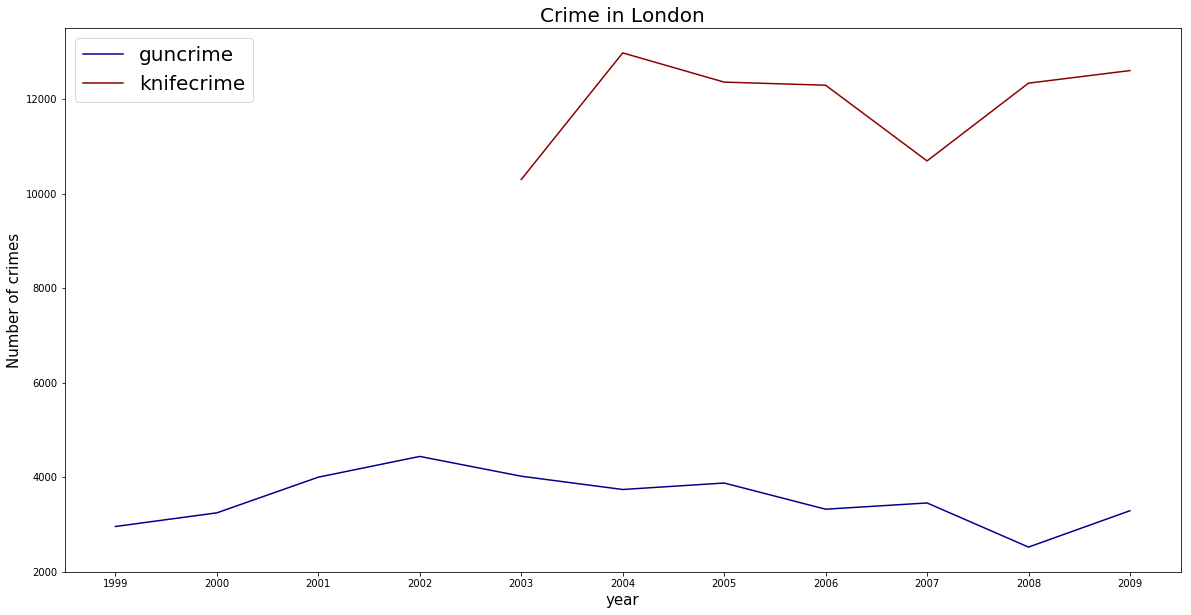

In [32]:
plt.plot(gun_crime.total, color='darkblue', label='guncrime')
plt.plot(knife_crime.total, color='darkred', label='knifecrime')

plt.title('Crime in London', fontsize=20)
plt.xlabel('year', fontsize=15)
plt.ylabel('Number of crimes', fontsize=15)

# Add legend
plt.legend(loc="upper left",fontsize=20)


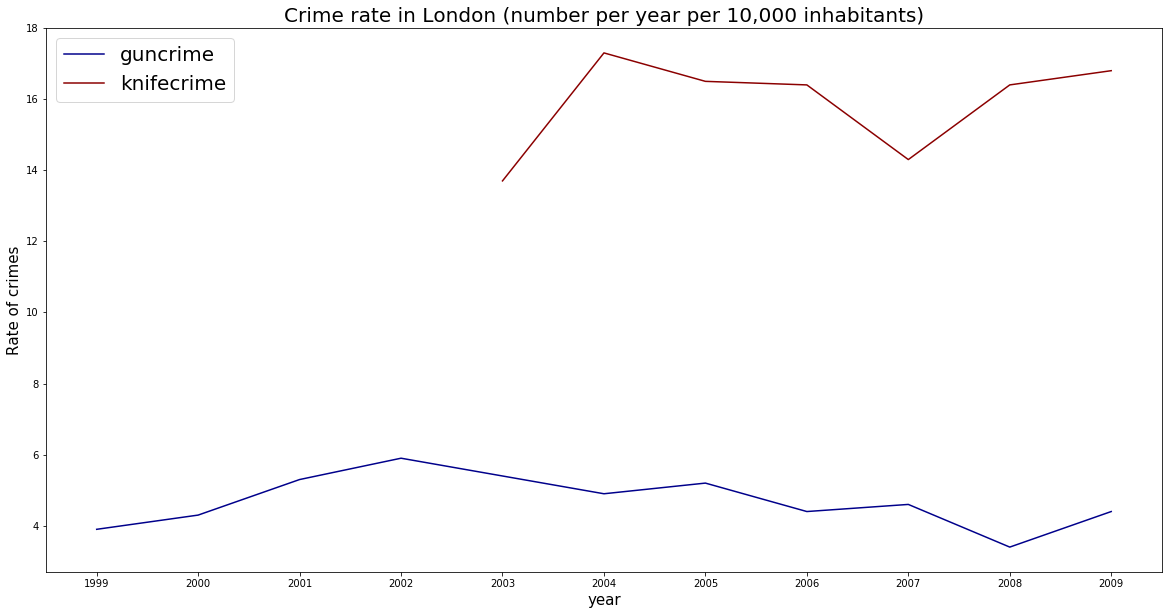

In [33]:
plt.plot(gun_crime.rate, color='darkblue', label='guncrime')
plt.plot(knife_crime.rate, color='darkred', label='knifecrime')

plt.title('Crime rate in London (number per year per 10,000 inhabitants)', fontsize=20)
plt.xlabel('year', fontsize=15)
plt.ylabel('Rate of crimes', fontsize=15)

# Add legend
plt.legend(loc="upper left",fontsize=20)


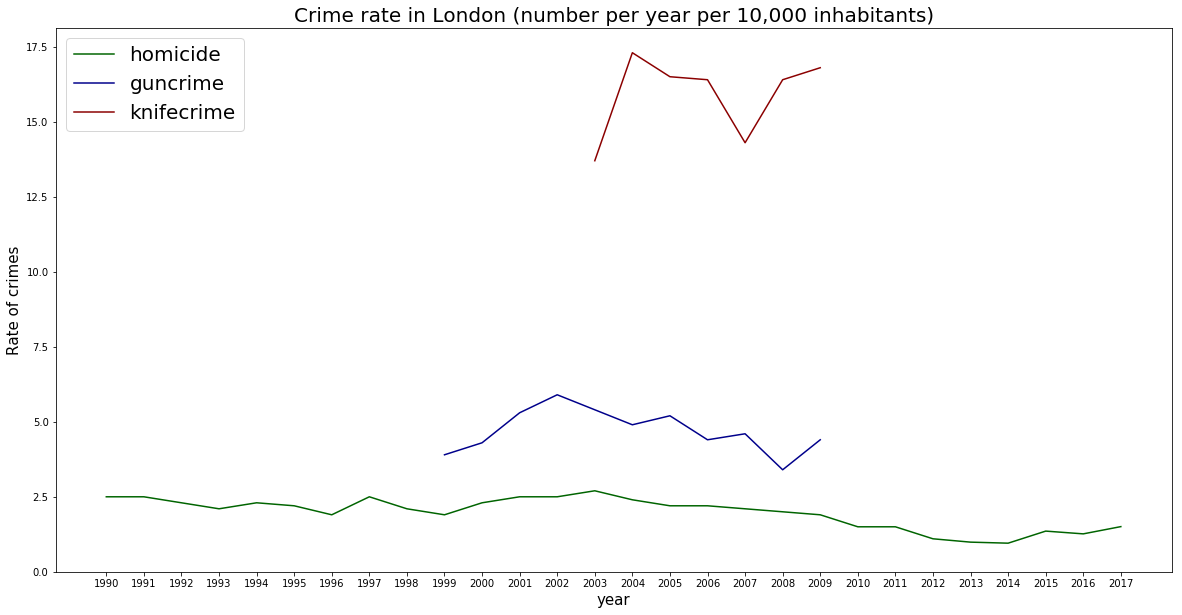

In [34]:
plt.plot(london_homicide.rate, color='darkgreen', label='homicide')
plt.plot(gun_crime.rate, color='darkblue', label='guncrime')
plt.plot(knife_crime.rate, color='darkred', label='knifecrime')

plt.title('Crime rate in London (number per year per 10,000 inhabitants)', fontsize=20)
plt.xlabel('year', fontsize=15)
plt.ylabel('Rate of crimes', fontsize=15)

plt.ylim(bottom=0)

# Add legend
plt.legend(loc="upper left",fontsize=20)


(0, 210.05000000000001)

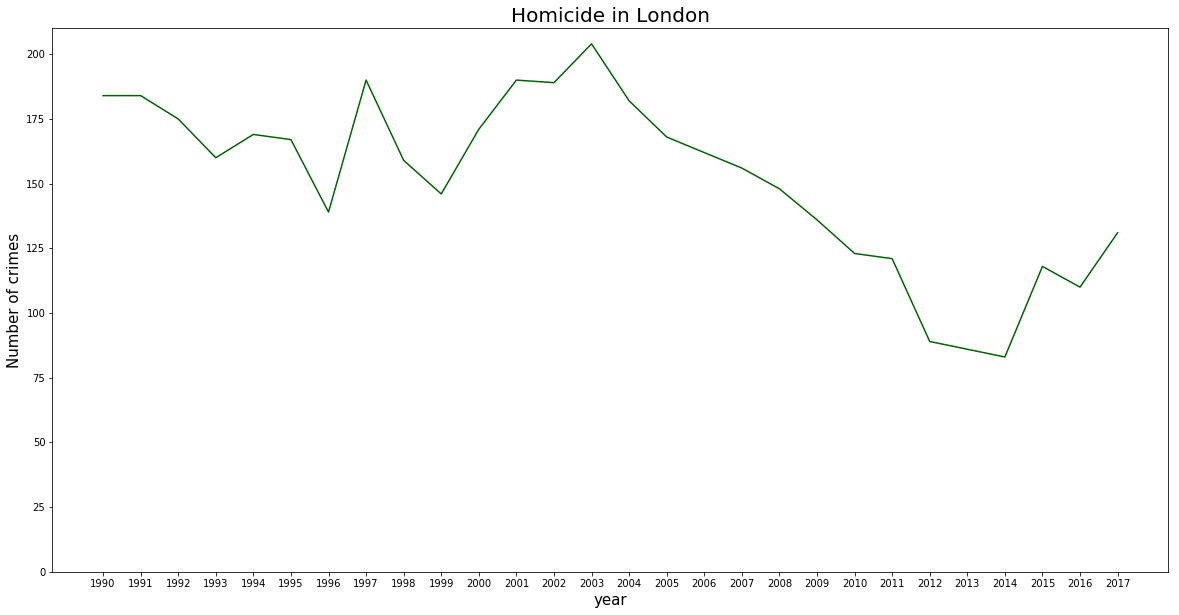

In [35]:
plt.plot(london_homicide.total, color='darkgreen', label='homicide' )

plt.title('Homicide in London', fontsize=20)
plt.xlabel('year', fontsize=15)
plt.ylabel('Number of crimes', fontsize=15)

plt.ylim(bottom=0)


In [36]:
# Now for New York

In [37]:
NYwebpage = "https://en.wikipedia.org/wiki/Crime_in_New_York_City"

In [38]:
NYpage = requests.get(NYwebpage)
NYpage.status_code

200

In [39]:
soup = BeautifulSoup(NYpage.text, "html.parser")

In [40]:
NYall_tables = soup.find_all('table')
NYall_tables

[<table class="infobox" style="width:22em"><tbody><tr><th class="fn org" colspan="2" style="text-align:center;font-size:125%;font-weight:bold;white-space: nowrap; background-color:#660000;color:white;padding:.2em;">New York City</th></tr><tr><td colspan="2" style="text-align:center;white-space: nowrap; background-color:#CCCCCC;color:#000000;">
 Crime rates* (2016)</td></tr><tr><th colspan="2" style="text-align:center;white-space: nowrap; background-color:#CCCCCC;color:#000000;">Violent crimes</th></tr><tr><th scope="row"><a href="/wiki/Homicide" title="Homicide">Homicide</a></th><td>
 3.4</td></tr><tr><th scope="row"><a href="/wiki/Rape" title="Rape">Forcible rape</a></th><td>
 14.0</td></tr><tr><th scope="row"><a href="/wiki/Robbery" title="Robbery">Robbery</a></th><td>
 198.2</td></tr><tr><th scope="row"><a class="mw-redirect" href="/wiki/Aggravated_assault" title="Aggravated assault">Aggravated assault</a></th><td>
 357.2</td></tr><tr><th scope="row"><a href="/wiki/Violent_crime" ti

In [41]:
len(NYall_tables)

7

In [42]:
NYall_tables[4]

<table class="wikitable">
<tbody><tr>
<th>Year
</th>
<th>Murders
</th></tr>
<tr>
<td>1959</td>
<td align="center">390<sup class="reference" id="cite_ref-NYC_murders_1939-59_202-20"><a href="#cite_note-NYC_murders_1939-59-202">[201]</a></sup>
</td></tr>
<tr>
<td>1960</td>
<td align="center">482
</td></tr>
<tr>
<td>1961</td>
<td align="center">483
</td></tr>
<tr>
<td>1962</td>
<td align="center">631
</td></tr>
<tr>
<td>1963</td>
<td align="center">548<sup class="reference" id="cite_ref-NYC_murder_203-0"><a href="#cite_note-NYC_murder-203">[202]</a></sup>
</td></tr>
<tr>
<td>1964</td>
<td align="center">636<sup class="reference" id="cite_ref-NYC_murder_203-1"><a href="#cite_note-NYC_murder-203">[202]</a></sup>
</td></tr>
<tr>
<td>1965</td>
<td align="center">634<sup class="reference" id="cite_ref-NYC_murder_203-2"><a href="#cite_note-NYC_murder-203">[202]</a></sup>
</td></tr>
<tr>
<td>1966</td>
<td align="center">654<sup class="reference" id="cite_ref-NYC_murder_203-3"><a href="#cite_note

In [43]:
cell = []
date = []
total = []

i = 0
for row in NYall_tables[4].findAll("tr"):
    cell = row.findAll('td')
    #print(i, cell)
    i = i+1
    
    for i in range(len(cell)):
        if i==1:
            date.append(cell[0].contents[0]) 
            total.append(cell[1].contents[0]) 
    
            #print(i, cell[0].contents[0], cell[1].contents[0])
  
NYdata = pd.DataFrame(np.column_stack([date, total]),
                    columns=["date","total"]) 

NYdata.set_index('date', inplace=True)
NYdata['total'] = NYdata['total'].str.replace('\n', '')


NYdata

,total
date,
1959,390
1960,482
1961,483
1962,631
1963,548
1964,636
1965,634
1966,654
1967,746


In [44]:
cell = []
date = []
total = []

i = 0
for row in NYall_tables[5].findAll("tr"):
    cell = row.findAll('td')
    #print(i, cell)
    i = i+1
    
    for i in range(len(cell)):
        if i==1:
            date.append(cell[0].contents[0]) 
            total.append(cell[1].contents[0]) 
    
            #print(i, cell[0].contents[0], cell[1].contents[0])
  
NYdata2 = pd.DataFrame(np.column_stack([date, total]),
                    columns=["date","total"]) 

NYdata2.set_index('date', inplace=True)
NYdata2['total'] = NYdata2['total'].str.replace('\n', '')

NYdata2

,total
date,
1989,1905
1990,2245
1991,2154
1992,1995
1993,1946
1994,1561
1995,1177
1996,983
1997,770


In [45]:
for i in range (len(NYdata2)):
    NYdata.total[i] = int(NYdata.total[i])
    NYdata2.total[i] = int(NYdata2.total[i])

Text(0,0.5,'Number of crimes')

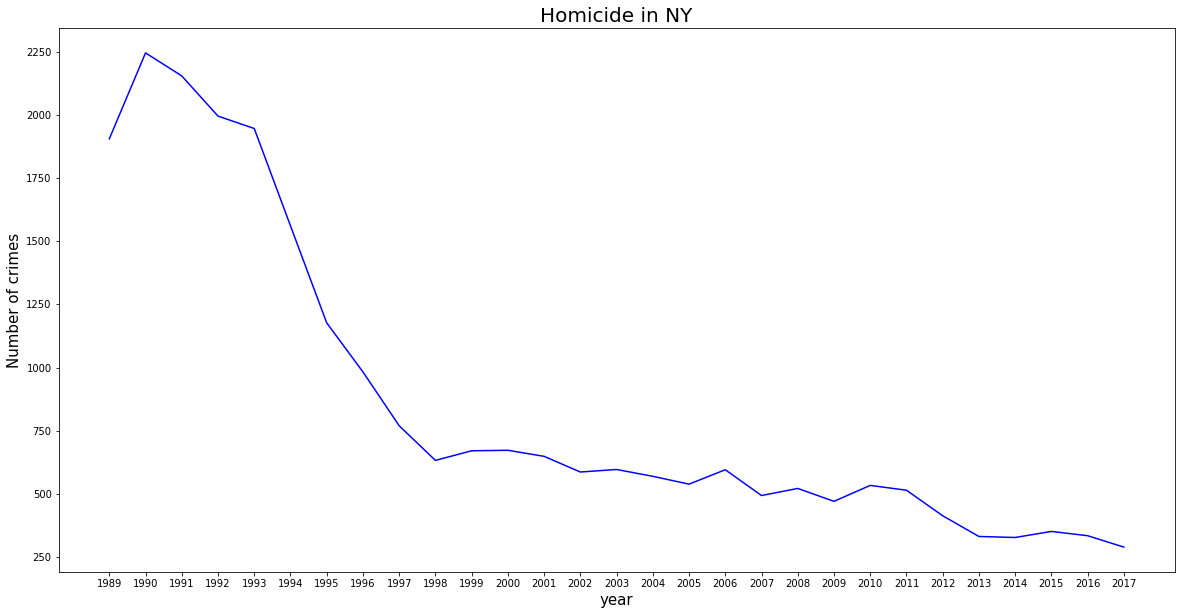

In [46]:
plt.plot(NYdata2.total, color='blue', label='homicide' )

plt.title('Homicide in NY', fontsize=20)
plt.xlabel('year', fontsize=15)
plt.ylabel('Number of crimes', fontsize=15)


In [47]:
import seaborn as sns
sns.set()

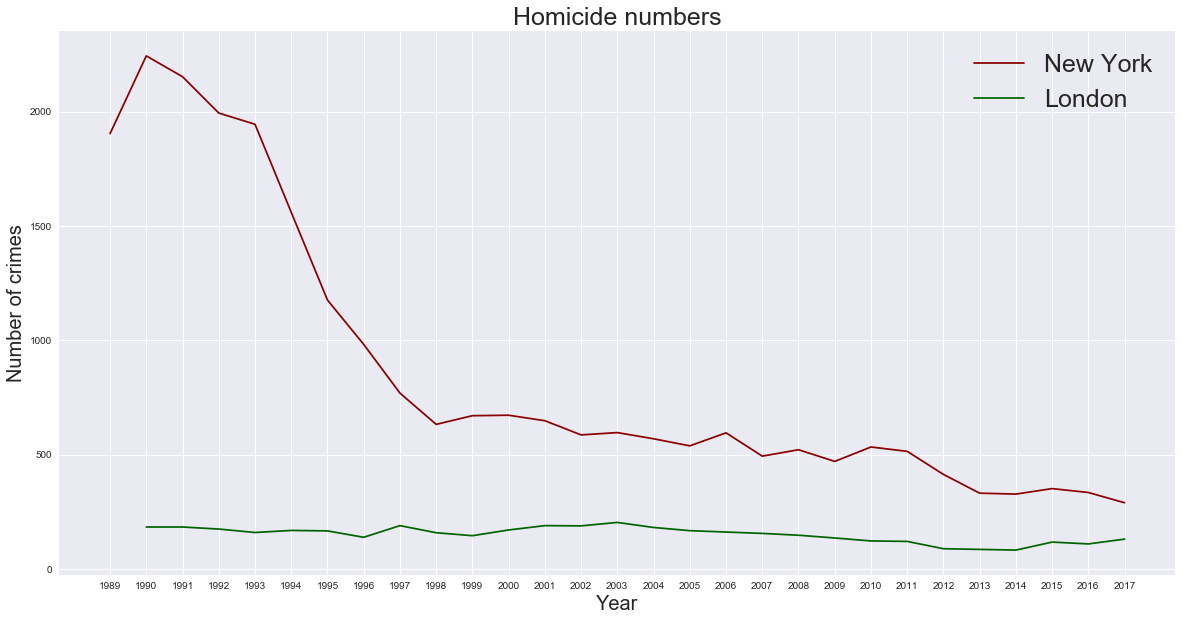

In [48]:
plt.plot(NYdata2.total, color='darkred', label='New York' )
plt.plot(london_homicide.total, color='darkgreen', label='London' )


plt.title('Homicide numbers', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of crimes', fontsize=20)

# Add legend
plt.legend(loc="upper right",fontsize=25)


In [49]:
# 2017
# population NY : 8.623 million 
# population London  : 8.787 million
# Populations very similar -> numbers convert to rates

In [50]:
NYdata2.head()

,total
date,
1989,1905
1990,2245
1991,2154
1992,1995
1993,1946


In [51]:
NYrate = NYdata2.total / 86.

In [52]:
NYdata2.insert(1, "rate", NYrate)

In [53]:
NYdata2.head()

,total,rate
date,,
1989,1905,22.1512
1990,2245,26.1047
1991,2154,25.0465
1992,1995,23.1977
1993,1946,22.6279


In [54]:
london_homicide.head()

,total,rate
date,,
1990,184,2.5
1991,184,2.5
1992,175,2.3
1993,160,2.1
1994,169,2.3


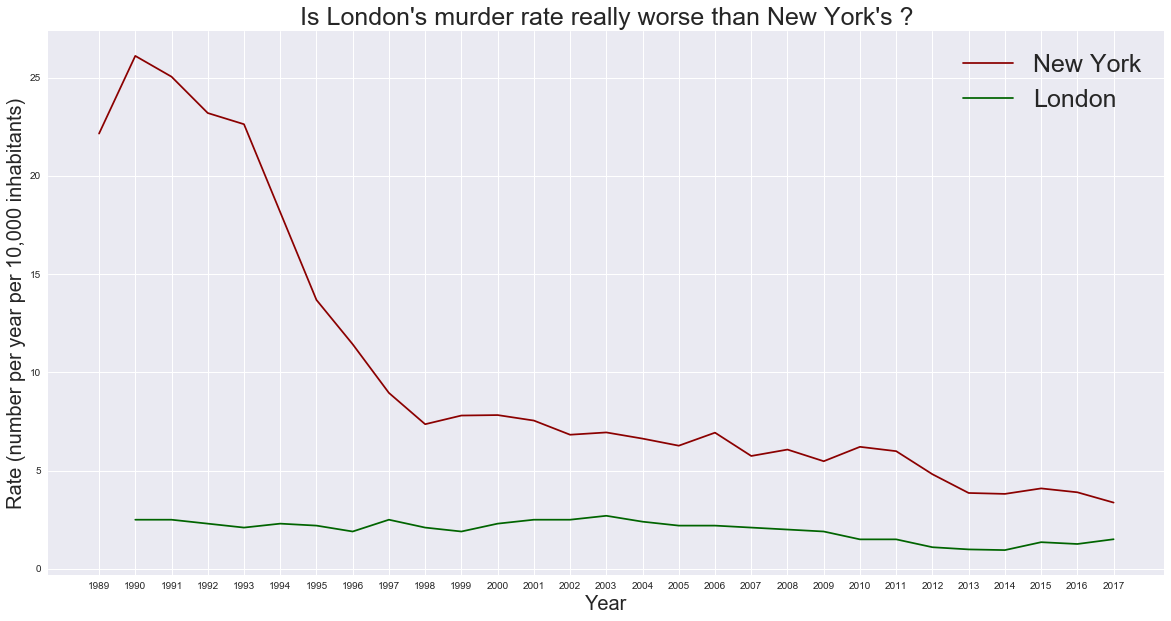

In [56]:
plt.plot(NYdata2.rate, color='darkred', label='New York' )
plt.plot(london_homicide.rate, color='darkgreen', label='London' )


plt.title('Is London\'s murder rate really worse than New York\'s ?', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rate (number per year per 10,000 inhabitants)', fontsize=20)

# Add legend
plt.legend(loc="upper right",fontsize=25)
